In [1]:
import os
import sys

sys.path.append("..")
os.chdir("/home/sean/HAI/main_server/hai")

In [4]:
%load_ext autoreload
%autoreload 2
from controllers.tests.learner import Learner
import time

In [12]:
start_time = time.time()-3600

In [284]:
import numpy as np

def generate_random_labels():
    return [(start_time + np.random.random()*3600, np.random.randint(2)) for i in range(5)]

In [285]:
from controllers.tests.learner import Learner

cams = ["webcam0", "webcam1"]
learner = Learner("koki", cams, start_time)

In [294]:
labels = {"hue": generate_random_labels(), "tv": generate_random_labels(), "ac": generate_random_labels()}
models, misc = learner.update_models(labels, end_time=start_time+3600)

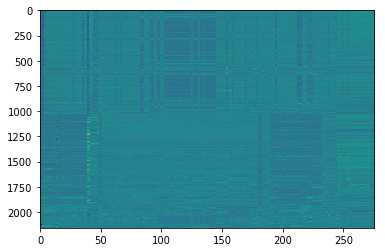

In [295]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

plt.imshow(StandardScaler().fit_transform(misc["matrix"]).T, aspect='auto')

In [296]:
from controllers.utils import get_current_images

In [297]:
imgs = get_current_images("koki", cams)

In [298]:
preds = learner.predict("hue", [imgs])
preds

(array([0], dtype=int32), array([ 0.55]))

In [ ]:
from notebooks.utils.utils import ImageUpdater

ImageUpdater.write_video(cams, models, misc, "hue", "test2.mp4", skip=10)

total frames: 276
0
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
